In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import glob
import os
import cv2 as cv
import numpy as np

def load_data(path):
    data=[]
    label=[]
    files=glob.glob(path+'/DATA')
    file_inside=os.listdir(files[0])
    for f in file_inside:
        image_folder=os.path.join(files[0],f)
        image_paths=os.listdir(image_folder)
        for image in image_paths:
            image_path=os.path.join(image_folder,image)
            img=cv.imread(image_path)
            resized=cv.resize(img,(240,240))
            image = cv.cvtColor(resized, cv.COLOR_BGR2RGB)
            image_array = np.array(image)
            
            data.append(image_array)
            label.append([int(f)])
    return data,label
        
        
dataset,label=load_data('/kaggle/input/traffic-data')

In [6]:
test_file_dir='/kaggle/input/traffic-data/TEST'
test_images=os.listdir(test_file_dir)
test_data=[]
for image_name in test_images:
    image_path=os.path.join(test_file_dir,image_name)
    img=cv.imread(image_path)
    resized=cv.resize(img,(240,240))
    image = cv.cvtColor(resized, cv.COLOR_BGR2RGB)
    image_array = np.array(image)
    test_data.append(image_array)

In [7]:
_test_data=np.array(test_data)
_test_data=_test_data/255

In [8]:
import matplotlib.pyplot as plt


def plotting_loss(result):
    loss=result.history['loss']
    val_loss=result.history['val_loss']
    epochs=range(1,len(loss)+1)
    plt.plot(epochs,loss,'y',label='Training loss')
    plt.plot(epochs,val_loss,'r',label='validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

In [10]:
import numpy as np

_dataset=np.array(dataset)
_label=np.array(label)

permutation = np.random.permutation(len(_dataset))
shuffled_dataset = _dataset[permutation]
shuffled_label = _label[permutation]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(shuffled_dataset,shuffled_label,test_size=0.25,random_state=55)
x_train=x_train/255
x_test=x_test/255

In [14]:
x_train.shape

(3127, 240, 240, 3)

In [34]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Generate augmented data generator for training
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,  
    height_shift_range=0.1, 
    
    zoom_range=0.2,           
    fill_mode='nearest'   
)
train_datagen.fit(x_train)
train_augmented_generator = train_datagen.flow(x_train, y_train, batch_size=32)




In [50]:
from keras.layers import Conv2D,MaxPool2D,Dense,Activation,Flatten,Dropout
import tensorflow as tf
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3),padding="same", activation='relu', input_shape=(240,240, 3)),
    tf.keras.layers.Conv2D(32, (3, 3),padding="same",activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3),padding="same",activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3),padding="same",activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3),padding="same",activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3),padding="same",activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(216, activation='relu'),
    
    tf.keras.layers.Dense(58,activation='softmax'),
])

model3.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

result3=model3.fit(train_augmented_generator,batch_size=32,validation_data=(x_test,y_test),epochs=20,verbose=2)

Epoch 1/20


W0000 00:00:1713289913.240572      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713289950.557427      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


98/98 - 49s - 500ms/step - accuracy: 0.1717 - loss: 3.4454 - val_accuracy: 0.3183 - val_loss: 2.4798
Epoch 2/20
98/98 - 33s - 339ms/step - accuracy: 0.3921 - loss: 2.1289 - val_accuracy: 0.4516 - val_loss: 1.7056
Epoch 3/20
98/98 - 33s - 337ms/step - accuracy: 0.5213 - loss: 1.5866 - val_accuracy: 0.6366 - val_loss: 1.2099
Epoch 4/20
98/98 - 33s - 332ms/step - accuracy: 0.6015 - loss: 1.2975 - val_accuracy: 0.7200 - val_loss: 0.8927
Epoch 5/20
98/98 - 33s - 339ms/step - accuracy: 0.6837 - loss: 1.0599 - val_accuracy: 0.7478 - val_loss: 0.7899
Epoch 6/20
98/98 - 34s - 345ms/step - accuracy: 0.7346 - loss: 0.8563 - val_accuracy: 0.8284 - val_loss: 0.5942
Epoch 7/20
98/98 - 33s - 337ms/step - accuracy: 0.7621 - loss: 0.7320 - val_accuracy: 0.8044 - val_loss: 0.5897
Epoch 8/20
98/98 - 33s - 338ms/step - accuracy: 0.8014 - loss: 0.6429 - val_accuracy: 0.8552 - val_loss: 0.4617
Epoch 9/20
98/98 - 33s - 336ms/step - accuracy: 0.8052 - loss: 0.5814 - val_accuracy: 0.8562 - val_loss: 0.4403
Epo

In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 240, 240, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 240, 240, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 120, 120, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 120, 120, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 120, 120, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 120, 120, 64)   │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 60, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 60, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 216)            │    24,883,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 58)             │        12,586 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,384,232 (291.38 MB)

 Trainable params: 25,461,410 (97.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 50,922,822 (194.26 MB)

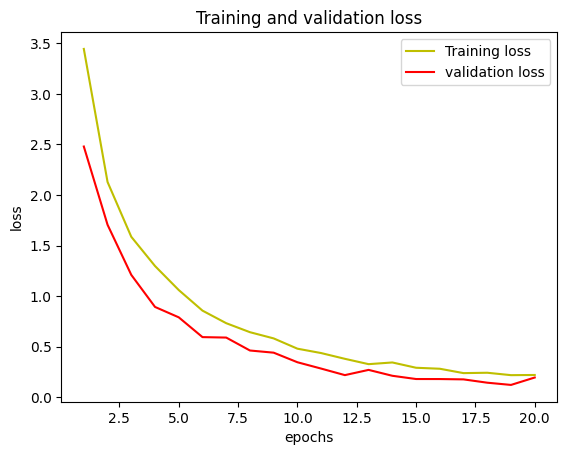

In [51]:
plotting_loss(result3)

random split 60


In [52]:
predictions=model3.predict(_test_data)

 5/63 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step

W0000 00:00:1713290676.259517      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step


In [53]:
predicted=predictions.argmax(-1)

In [24]:
test_file_dir='/kaggle/input/traffic-data/TEST'
test_images=os.listdir(test_file_dir)
original=[]
for name in test_images:
    original.append(int(name[0:3]))   

1112
882
